# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимают
* ся. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import scipy.stats as sps

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from IPython.display import clear_output

sns.set(font_scale=1.2, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Нужно от слоя к слою вычислять градиент функции.

**Вывод:**
...

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://miptstats.github.io/courses/ad_faivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

Напишем класс Neural_Network, который будет отвечать за работу с нейронной сетью

In [ ]:
def sigma(x):
    return 1/ (1 + np.exp(-x))

class Neural_Network:
    def __init__(self, spd, k, iter):
        self.tehta = np.zeros(7) # w11, w12, b11, b12, w21, w22, b2
        self.speed = spd # скорость обучения
        self.size = k # размер батча
        self.num_iter = iter # количество итераций

    def batch(self, X, y):
        for iter in range(self.num_iter):
            gradient_L = np.zeros(7)
            b = np.random.randint(len(X), size=self.size)
            for x_i, y_i in zip(X[b], y[b]):
                w11, w12, b11, b12, w21, w22, b2 = np.zeros(7)
                n = len(x_i)
                for i in range(n):
                  y_predict = self.tehta[[4, 5]] @ np.transpose(sigma(self.tehta[[0, 1]] * x_i[i] + self.tehta[[2, 3]])) + self.tehta[6]
                  w11 += (2/n) * ((y_predict - y_i[i]) * self.tehta[4] * sigma(self.tehta[0] * x_i[i] + self.tehta[2])) * (1 - sigma(self.tehta[0] * x_i[i] + self.tehta[2])) * x_i[i]
                  w12 += (2/n) * ((y_predict - y_i[i]) * self.tehta[5] * sigma(self.tehta[1] * x_i[i] + self.tehta[3])) * (1 - sigma(self.tehta[1] * x_i[i] + self.tehta[3])) * x_i[i]
                  b11 += (2/n) * ((y_predict - y_i[i]) * sigma(self.tehta[0] * x_i[i] + self.tehta[2])) * (1 - sigma(self.tehta[0] * x_i[i] + self.tehta[2])) * self.tehta[4] 
                  b12 += (2/n) * ((y_predict - y_i[i]) * sigma(self.tehta[1] * x_i[i] + self.tehta[3])) * (1 - sigma(self.tehta[1] * x_i[i] + self.tehta[3])) * self.tehta[5] 
                  w21 += (2/n) * (y_predict - y_i[i]) * sigma(self.tehta[0] * x_i[i] + self.tehta[2])
                  w22 += (2/n) * (y_predict - y_i[i]) * sigma(self.tehta[1] * x_i[i] + self.tehta[3])
                  b2 += (2/n) * (y_predict - y_i[i])
                gradient_L += np.array([w11, w12, b11, b12, w21, w22, b2])
            self.tehta -= (self.speed / self.size) * gradient_L

        return self

    def predict(self, X):
        predict = self.tehta[[4, 5]] @ np.transpose(sigma(self.tehta[[0, 1]] * X + self.tehta[[2, 3]])) + self.tehta[6]
        return predict



Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = np.exp(X - 0.2) - 3*X + 7
assert y.shape == (sample_size, 1)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`.

In [ ]:
data = np.hstack((X, y))
np.random.shuffle(data)

train, test = data[:int(len(data) * 0.7), :], data[int(len(data) * 0.7):, :]

X_train = train[:, 0].reshape(-1, 1)
y_train = train[:, 1].reshape(-1, 1)

X_test = test[:, 0].reshape(-1, 1)
y_test = test[:, 1].reshape(-1, 1)

Построим линейную регрессию.

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_preds = model.predict(X_test)

C помощью класса Neural_Network построим нейросеть, описанную в 1 задаче.

In [ ]:
network_model = Neural_Network(0.005, 40, 12000)
network_model.batch(X_train, y_train)

network_predicted = network_model.predict(X_test)

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

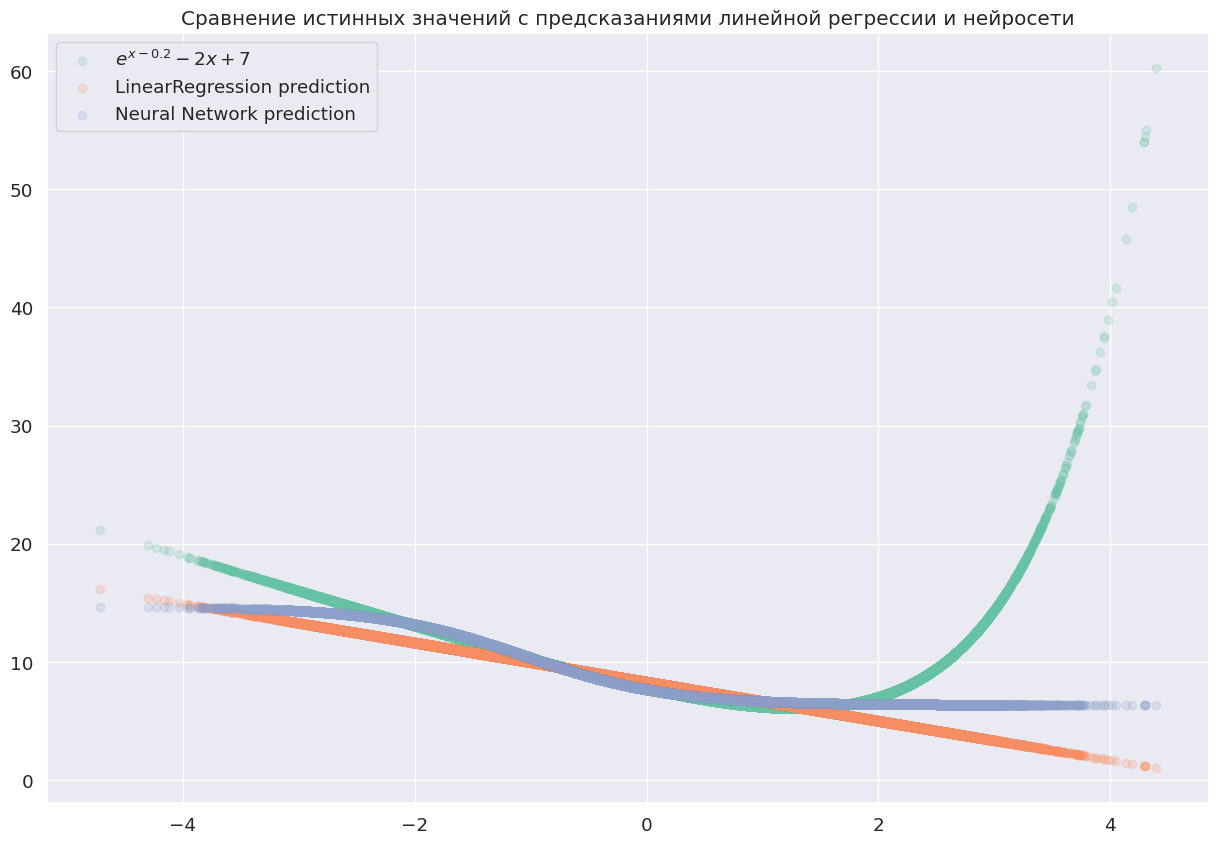

In [ ]:
plt.figure(figsize=(15, 10))

plt.scatter(X_test, y_test, label='$e^{x - 0.2} - 2x + 7$', alpha = 0.2)
plt.scatter(X_test, test_preds, label='LinearRegression prediction', alpha = 0.2)
plt.scatter(X_test, network_predicted, label='Neural Network prediction', alpha = 0.2)

plt.legend()
plt.title('Сравнение истинных значений с предсказаниями линейной регресcии и нейросети')

plt.show()

Повторите вычисления для другой нелинейной функции $y(x)$.

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = X**(5) - 4*(X**2 + X) + 2
assert y.shape == (sample_size, 1)

In [ ]:
data = np.hstack((X, y))
np.random.shuffle(data)

train, test = data[:int(len(data) * 0.7), :], data[int(len(data) * 0.7):, :]

X_train = train[:, 0].reshape(-1, 1)
y_train = train[:, 1].reshape(-1, 1)

X_test_2 = test[:, 0].reshape(-1, 1)
y_test_2 = test[:, 1].reshape(-1, 1)

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

test_preds = model.predict(X_test)

In [ ]:
network_model = Neural_Network(0.005, 40, 12000)
network_model.batch(X_train, y_train)

network_predicted = network_model.predict(X_test_2)

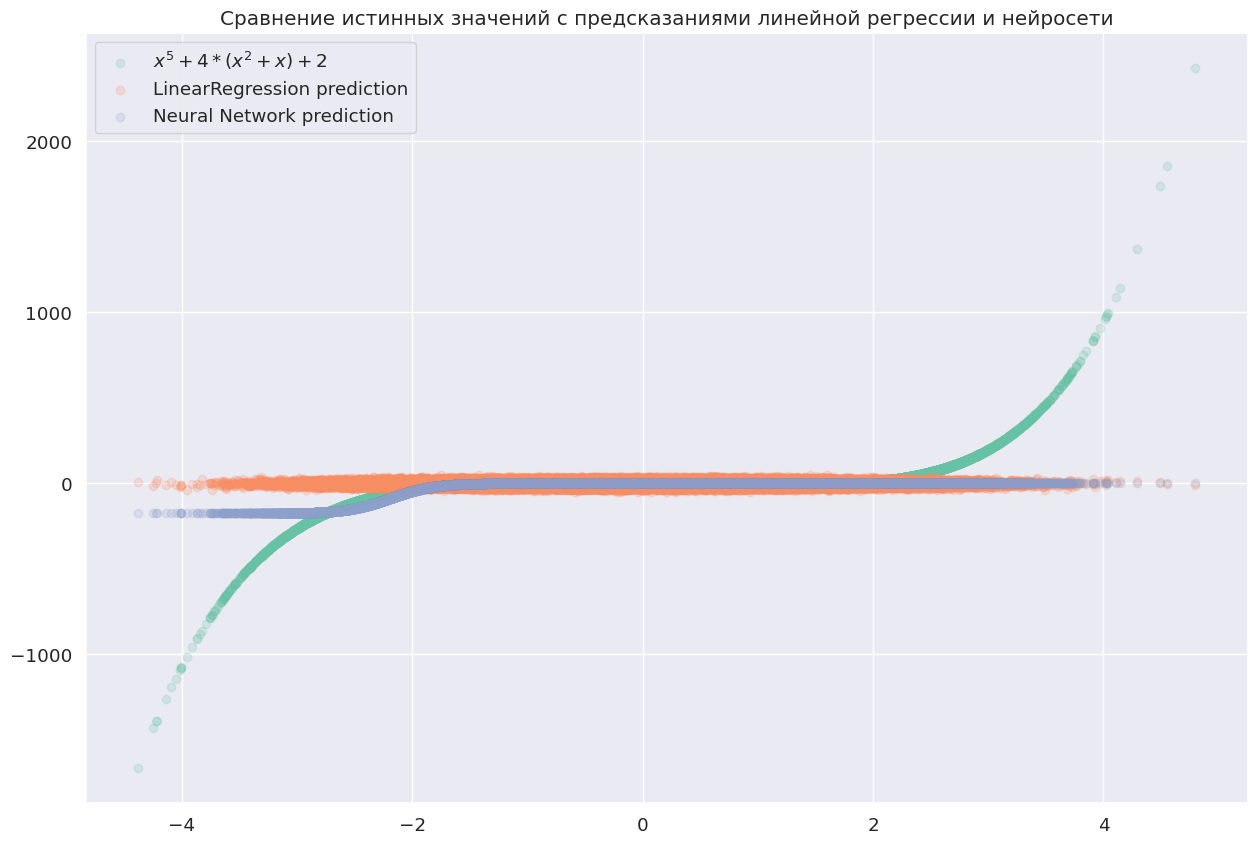

In [ ]:
plt.figure(figsize=(15, 10))

plt.scatter(X_test_2, y_test_2, label='$x^{5} + 4*(x^{2} + x) + 2$', alpha = 0.2)
plt.scatter(X_test_2, test_preds, label='LinearRegression prediction', alpha = 0.2)
plt.scatter(X_test_2, network_predicted, label='Neural Network prediction', alpha = 0.2)

plt.legend()
plt.title('Сравнение истинных значений с предсказаниями линейной регресcии и нейросети')

plt.show()

**Вывод:**
Обе модели, в случае большого количества точек, довольно точно предсказывают поведение функции. Так же видно, что нейроная сеть предсказывает точнее.


---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [ ]:
X_torch = torch.tensor(X_test, dtype=torch.float32)
y_torch = torch.tensor(y_test, dtype=torch.float32)

Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.

In [ ]:
# собираем модули в последовательность
model_torch = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=2), 
    torch.nn.Sigmoid(),  
    torch.nn.Linear(in_features=2, out_features=1)  
)

model_torch

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

In [ ]:
x_new = X_torch.reshape(-1, 1)
y_new = y_torch.reshape(-1, 1)
for name, param in model_torch.named_parameters():
    print(name)
    print(param.data)

0.weight
tensor([[ 0.4981],
        [-0.7694]])
0.bias
tensor([0.1689, 0.0663])
2.weight
tensor([[ 0.6053, -0.2725]])
2.bias
tensor([-0.2272])


In [ ]:
optimizer = torch.optim.SGD(model_torch.parameters(), lr=0.01)
optim_func = torch.nn.MSELoss()

In [ ]:
def show_progress(x, y, y_pred, loss, test_preds):
    # Избавимся от градиентов перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число, для красивого отображения
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.3, label='$x^{5} + 4*(x^{2} + x) + 2$')
    plt.scatter(x, y_pred, alpha=0.3, label='PyTorch Neural_Network')
    plt.scatter(x, test_preds, alpha=0.1, label='custom Neural_Network')
    plt.title('Сравнение истинных значений с предсказаниями нейросети из PyTorch и двуслойной нейросети')
    plt.legend()
    
    plt.show()

    print(f"MSE = {loss:.3f}")

In [ ]:
# Количество итераций
num_iter = 10000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model_torch(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции 
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего 
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

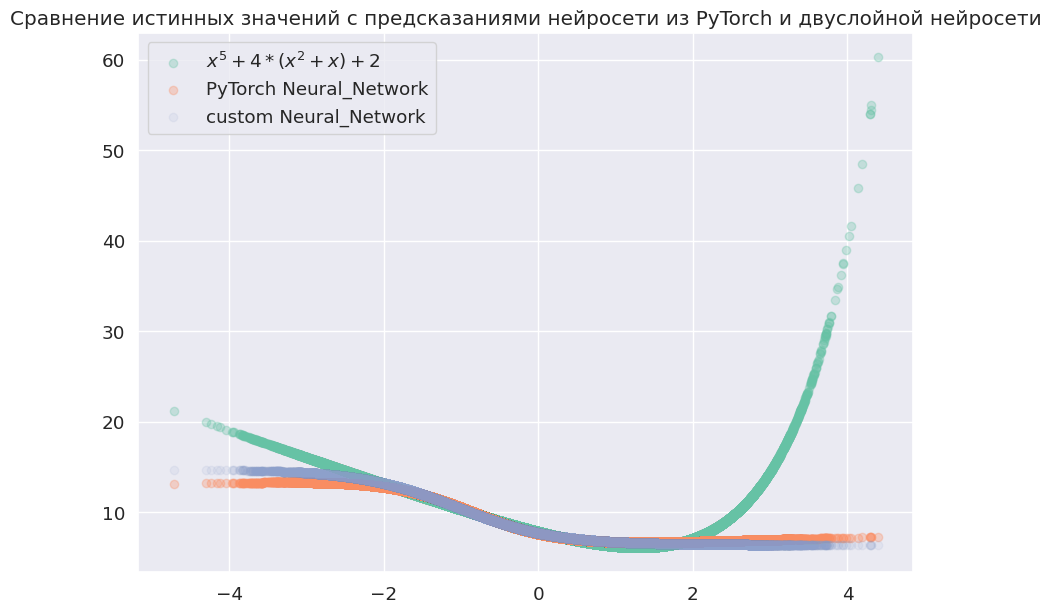

MSE = 0.522


In [ ]:
show_progress(X_torch, y_torch, y_pred, loss, network_predicted)

Повторим все дейсвия на вторых данных

In [ ]:
X_torch_2 = torch.tensor(X_test_2, dtype=torch.float32)
y_torch_2 = torch.tensor(y_test_2, dtype=torch.float32)
x_new_2 = X_torch_2.reshape(-1, 1)
y_new_2 = y_torch_2.reshape(-1, 1)

In [ ]:
# собираем модули в последовательность
model_torch = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=2), 
    torch.nn.Sigmoid(),  
    torch.nn.Linear(in_features=2, out_features=1)  
)

In [ ]:
x_new = X_torch_2.reshape(-1, 1)
y_new = y_torch_2.reshape(-1, 1)
for name, param in model_torch.named_parameters():
    print(name)
    print(param.data)

0.weight
tensor([[-0.9983],
        [-0.1282]])
0.bias
tensor([-0.0887, -0.0485])
2.weight
tensor([[-0.1589, -0.4958]])
2.bias
tensor([0.1007])


In [ ]:
optimizer = torch.optim.SGD(model_torch.parameters(), lr=0.01)
optim_func = torch.nn.MSELoss()

In [ ]:
def show_progress(x, y, y_pred, loss, test_preds):
    # Избавимся от градиентов перед отрисовкой графика
    y_pred = y_pred.detach()

    # Превратим тензор размерности 0 в число, для красивого отображения
    loss = loss.item()

    # Стираем предыдущий вывод в тот момент, когда появится следующий
    clear_output(wait=True)

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.3, label='$e^{x - 0.2} - 2x + 7$')
    plt.scatter(x, y_pred, alpha=0.3, label='PyTorch Neural_Network')
    plt.scatter(x, test_preds, alpha=0.1, label='custom Neural_Network')
    plt.title('Сравнение истинных значений с предсказаниями нейросети из PyTorch и двуслойной нейросети')
    plt.legend()
    
    plt.show()

    print(f"MSE = {loss:.3f}")

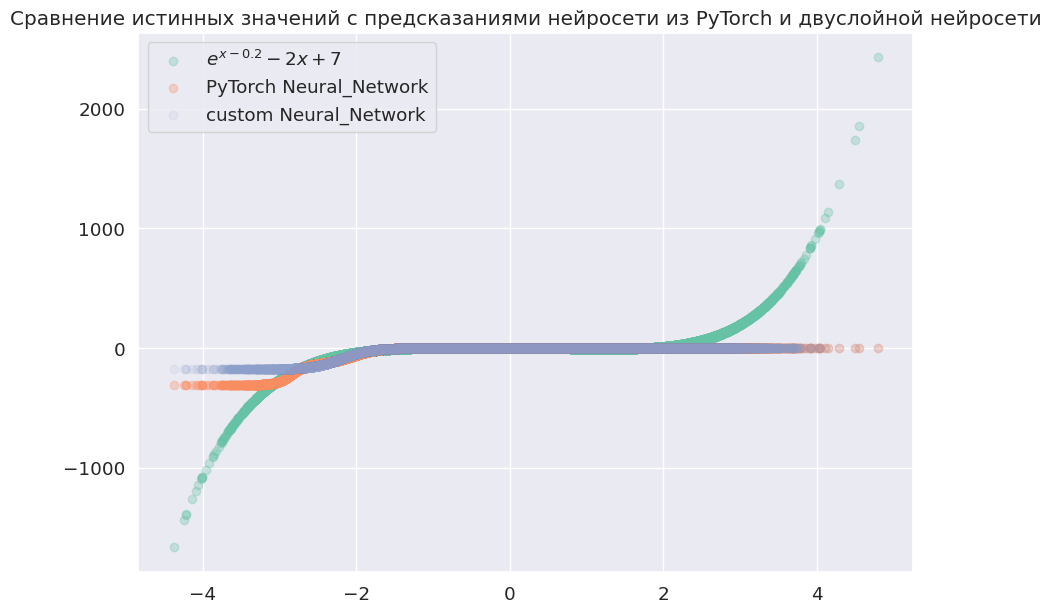

MSE = 423.291


In [ ]:
# Количество итераций
num_iter = 10000

for i in range(num_iter):

    # Forward pass: предсказание модели по данным x_new
    y_pred = model_torch(x_new)

    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_new)

    # Bakcward pass: вычисление градиентов оптимизируемой функции 
    # по всем параметрам модели
    loss.backward()

    # Оптимизация: обновление параметров по формулам соответствующего 
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()


show_progress(X_torch_2, y_torch_2, y_pred, loss, network_predicted)

**Вывод:**
Нейроная сеть, построенная с помощью PyTorch предсказывает данные с более высокой точнотью, чем построенная во второй задаче. Но не так сильно отклоняются в большом количестве точек, они практически совпадают. Поэтому можно сделать вывод, что формулы посчитанные в 1 задаче были верны.